# data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the dataset

In [9]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
data = pd.read_csv("stock_pak.csv")

# Minor Preprocessing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3221 non-null   object
 1   Open    3221 non-null   object
 2   High    3221 non-null   object
 3   Low     3221 non-null   object
 4   Close   3221 non-null   object
 5   Change  3221 non-null   object
 6   Volume  3221 non-null   object
dtypes: object(7)
memory usage: 176.3+ KB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\Ahmad Karim\AppData\Local\Temp\ipykernel_2836\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3221 non-null   datetime64[ns]
 1   Open    3221 non-null   object        
 2   High    3221 non-null   object        
 3   Low     3221 non-null   object        
 4   Close   3221 non-null   object        
 5   Change  3221 non-null   object        
 6   Volume  3221 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 176.3+ KB


In [11]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '') 
        data[col] = pd.to_numeric(data[col])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3221 non-null   datetime64[ns]
 1   Open    3221 non-null   float64       
 2   High    3221 non-null   float64       
 3   Low     3221 non-null   float64       
 4   Close   3221 non-null   float64       
 5   Change  3221 non-null   float64       
 6   Volume  3221 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 176.3 KB


In [13]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Change    0
Volume    0
dtype: int64

In [14]:
data = data.sort_values('Date')

In [15]:
data

Date      Open      High       Low     Close  Change     Volume
3220 2008-02-22  10634.22  10635.42  10546.38  10607.29    0.00  313082688
3219 2008-02-25  10625.66  10709.06  10579.49  10588.84  -18.45  273149184
3218 2008-02-26  10596.40  10668.35  10578.01  10668.35   79.51  265668784
3217 2008-02-27  10670.68  10732.92  10623.36  10664.36   -3.99  396419776
3216 2008-02-28  10688.98  10724.21  10655.23  10704.15   39.79  325539584
...         ...       ...       ...       ...       ...     ...        ...
4    2021-02-17  32166.21  32390.77  32044.01  32048.68  -93.15  701658181
3    2021-02-18  32049.85  32104.67  31745.72  31759.82 -288.86  577837595
2    2021-02-19  31748.75  31904.30  31749.43  31851.18   91.36  694795084
1    2021-02-22  31874.78  31958.58  31612.55  31647.57 -203.61  721952658
0    2021-02-23  31722.16  31800.90  31597.31  31626.19  -21.38  718191025

[3221 rows x 7 columns]

# Feature Engineering

In [17]:
data['Daily_Return'] = data['Close'].pct_change()

In [18]:
data

Date      Open      High       Low     Close  Change     Volume  \
3220 2008-02-22  10634.22  10635.42  10546.38  10607.29    0.00  313082688   
3219 2008-02-25  10625.66  10709.06  10579.49  10588.84  -18.45  273149184   
3218 2008-02-26  10596.40  10668.35  10578.01  10668.35   79.51  265668784   
3217 2008-02-27  10670.68  10732.92  10623.36  10664.36   -3.99  396419776   
3216 2008-02-28  10688.98  10724.21  10655.23  10704.15   39.79  325539584   
...         ...       ...       ...       ...       ...     ...        ...   
4    2021-02-17  32166.21  32390.77  32044.01  32048.68  -93.15  701658181   
3    2021-02-18  32049.85  32104.67  31745.72  31759.82 -288.86  577837595   
2    2021-02-19  31748.75  31904.30  31749.43  31851.18   91.36  694795084   
1    2021-02-22  31874.78  31958.58  31612.55  31647.57 -203.61  721952658   
0    2021-02-23  31722.16  31800.90  31597.31  31626.19  -21.38  718191025   

      Daily_Return  
3220           NaN  
3219     -0.001739  
3218      0.007509  
3217     -0.000374  
3216      0.003731  
...            ...  
4        -0.002898  
3        -0.009013  
2         0.002877  
1        -0.006393  
0        -0.000676  

[3221 rows x 8 columns]

In [19]:
data['MA_' + str(50)] = data['Close'].rolling(window=50).mean()
data['MA_' + str(200)] = data['Close'].rolling(window=200).mean()

In [20]:
data

Date      Open      High       Low     Close  Change     Volume  \
3220 2008-02-22  10634.22  10635.42  10546.38  10607.29    0.00  313082688   
3219 2008-02-25  10625.66  10709.06  10579.49  10588.84  -18.45  273149184   
3218 2008-02-26  10596.40  10668.35  10578.01  10668.35   79.51  265668784   
3217 2008-02-27  10670.68  10732.92  10623.36  10664.36   -3.99  396419776   
3216 2008-02-28  10688.98  10724.21  10655.23  10704.15   39.79  325539584   
...         ...       ...       ...       ...       ...     ...        ...   
4    2021-02-17  32166.21  32390.77  32044.01  32048.68  -93.15  701658181   
3    2021-02-18  32049.85  32104.67  31745.72  31759.82 -288.86  577837595   
2    2021-02-19  31748.75  31904.30  31749.43  31851.18   91.36  694795084   
1    2021-02-22  31874.78  31958.58  31612.55  31647.57 -203.61  721952658   
0    2021-02-23  31722.16  31800.90  31597.31  31626.19  -21.38  718191025   

      Daily_Return       MA_50       MA_200  
3220           NaN         NaN          NaN  
3219     -0.001739         NaN          NaN  
3218      0.007509         NaN          NaN  
3217     -0.000374         NaN          NaN  
3216      0.003731         NaN          NaN  
...            ...         ...          ...  
4        -0.002898  31347.2814  28297.09820  
3        -0.009013  31392.9426  28336.20925  
2         0.002877  31438.4628  28375.86365  
1        -0.006393  31478.5810  28413.96095  
0        -0.000676  31515.6932  28452.37330  

[3221 rows x 10 columns]

In [21]:
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

In [22]:
data['Price_Change_Direction'] = np.where(data['Close'].diff() > 0, 1, 0) 

In [23]:
data

Date      Open      High       Low     Close  Change     Volume  \
3220 2008-02-22  10634.22  10635.42  10546.38  10607.29    0.00  313082688   
3219 2008-02-25  10625.66  10709.06  10579.49  10588.84  -18.45  273149184   
3218 2008-02-26  10596.40  10668.35  10578.01  10668.35   79.51  265668784   
3217 2008-02-27  10670.68  10732.92  10623.36  10664.36   -3.99  396419776   
3216 2008-02-28  10688.98  10724.21  10655.23  10704.15   39.79  325539584   
...         ...       ...       ...       ...       ...     ...        ...   
4    2021-02-17  32166.21  32390.77  32044.01  32048.68  -93.15  701658181   
3    2021-02-18  32049.85  32104.67  31745.72  31759.82 -288.86  577837595   
2    2021-02-19  31748.75  31904.30  31749.43  31851.18   91.36  694795084   
1    2021-02-22  31874.78  31958.58  31612.55  31647.57 -203.61  721952658   
0    2021-02-23  31722.16  31800.90  31597.31  31626.19  -21.38  718191025   

      Daily_Return       MA_50       MA_200          VWAP  \
3220           NaN         NaN          NaN  10607.290000   
3219     -0.001739         NaN          NaN  10598.693397   
3218      0.007509         NaN          NaN  10620.416100   
3217     -0.000374         NaN          NaN  10634.371036   
3216      0.003731         NaN          NaN  10648.804222   
...            ...         ...          ...           ...   
4        -0.002898  31347.2814  28297.09820  21523.549354   
3        -0.009013  31392.9426  28336.20925  21532.732340   
2         0.002877  31438.4628  28375.86365  21543.850663   
1        -0.006393  31478.5810  28413.96095  21555.150500   
0        -0.000676  31515.6932  28452.37330  21566.342651   

      Price_Change_Direction  
3220                       0  
3219                       0  
3218                       1  
3217                       0  
3216                       1  
...                      ...  
4                          0  
3                          0  
2                          1  
1                          0  
0                          0  

[3221 rows x 12 columns]

In [24]:
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'MA_50', 'MA_200', 'VWAP'] 

In [25]:
columns_with_missing = ['Daily_Return', 'MA_50', 'MA_200']
data[columns_with_missing] = data[columns_with_missing].fillna(method='bfill')

C:\Users\Ahmad Karim\AppData\Local\Temp\ipykernel_2836\3261469459.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[columns_with_missing] = data[columns_with_missing].fillna(method='bfill')


In [26]:
data.isna().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Change                    0
Volume                    0
Daily_Return              0
MA_50                     0
MA_200                    0
VWAP                      0
Price_Change_Direction    0
dtype: int64

In [27]:
data

Date      Open      High       Low     Close  Change     Volume  \
3220 2008-02-22  10634.22  10635.42  10546.38  10607.29    0.00  313082688   
3219 2008-02-25  10625.66  10709.06  10579.49  10588.84  -18.45  273149184   
3218 2008-02-26  10596.40  10668.35  10578.01  10668.35   79.51  265668784   
3217 2008-02-27  10670.68  10732.92  10623.36  10664.36   -3.99  396419776   
3216 2008-02-28  10688.98  10724.21  10655.23  10704.15   39.79  325539584   
...         ...       ...       ...       ...       ...     ...        ...   
4    2021-02-17  32166.21  32390.77  32044.01  32048.68  -93.15  701658181   
3    2021-02-18  32049.85  32104.67  31745.72  31759.82 -288.86  577837595   
2    2021-02-19  31748.75  31904.30  31749.43  31851.18   91.36  694795084   
1    2021-02-22  31874.78  31958.58  31612.55  31647.57 -203.61  721952658   
0    2021-02-23  31722.16  31800.90  31597.31  31626.19  -21.38  718191025   

      Daily_Return       MA_50       MA_200          VWAP  \
3220     -0.001739  10798.4736   8418.92620  10607.290000   
3219     -0.001739  10798.4736   8418.92620  10598.693397   
3218      0.007509  10798.4736   8418.92620  10620.416100   
3217     -0.000374  10798.4736   8418.92620  10634.371036   
3216      0.003731  10798.4736   8418.92620  10648.804222   
...            ...         ...          ...           ...   
4        -0.002898  31347.2814  28297.09820  21523.549354   
3        -0.009013  31392.9426  28336.20925  21532.732340   
2         0.002877  31438.4628  28375.86365  21543.850663   
1        -0.006393  31478.5810  28413.96095  21555.150500   
0        -0.000676  31515.6932  28452.37330  21566.342651   

      Price_Change_Direction  
3220                       0  
3219                       0  
3218                       1  
3217                       0  
3216                       1  
...                      ...  
4                          0  
3                          0  
2                          1  
1                          0  
0                          0  

[3221 rows x 12 columns]

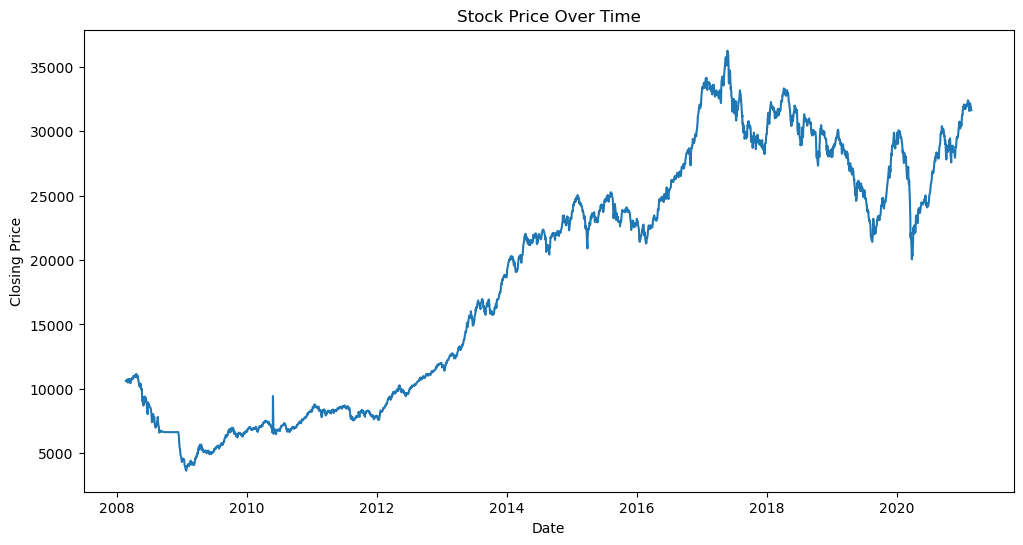

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Over Time')
plt.show()

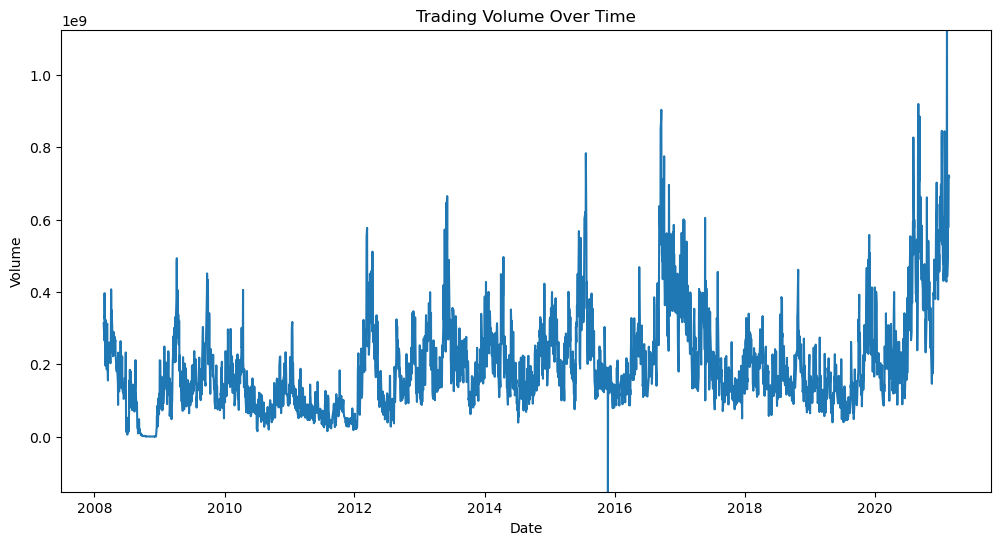

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.ylim(data['Volume'].min(), data['Volume'].max() + 100)
plt.show()

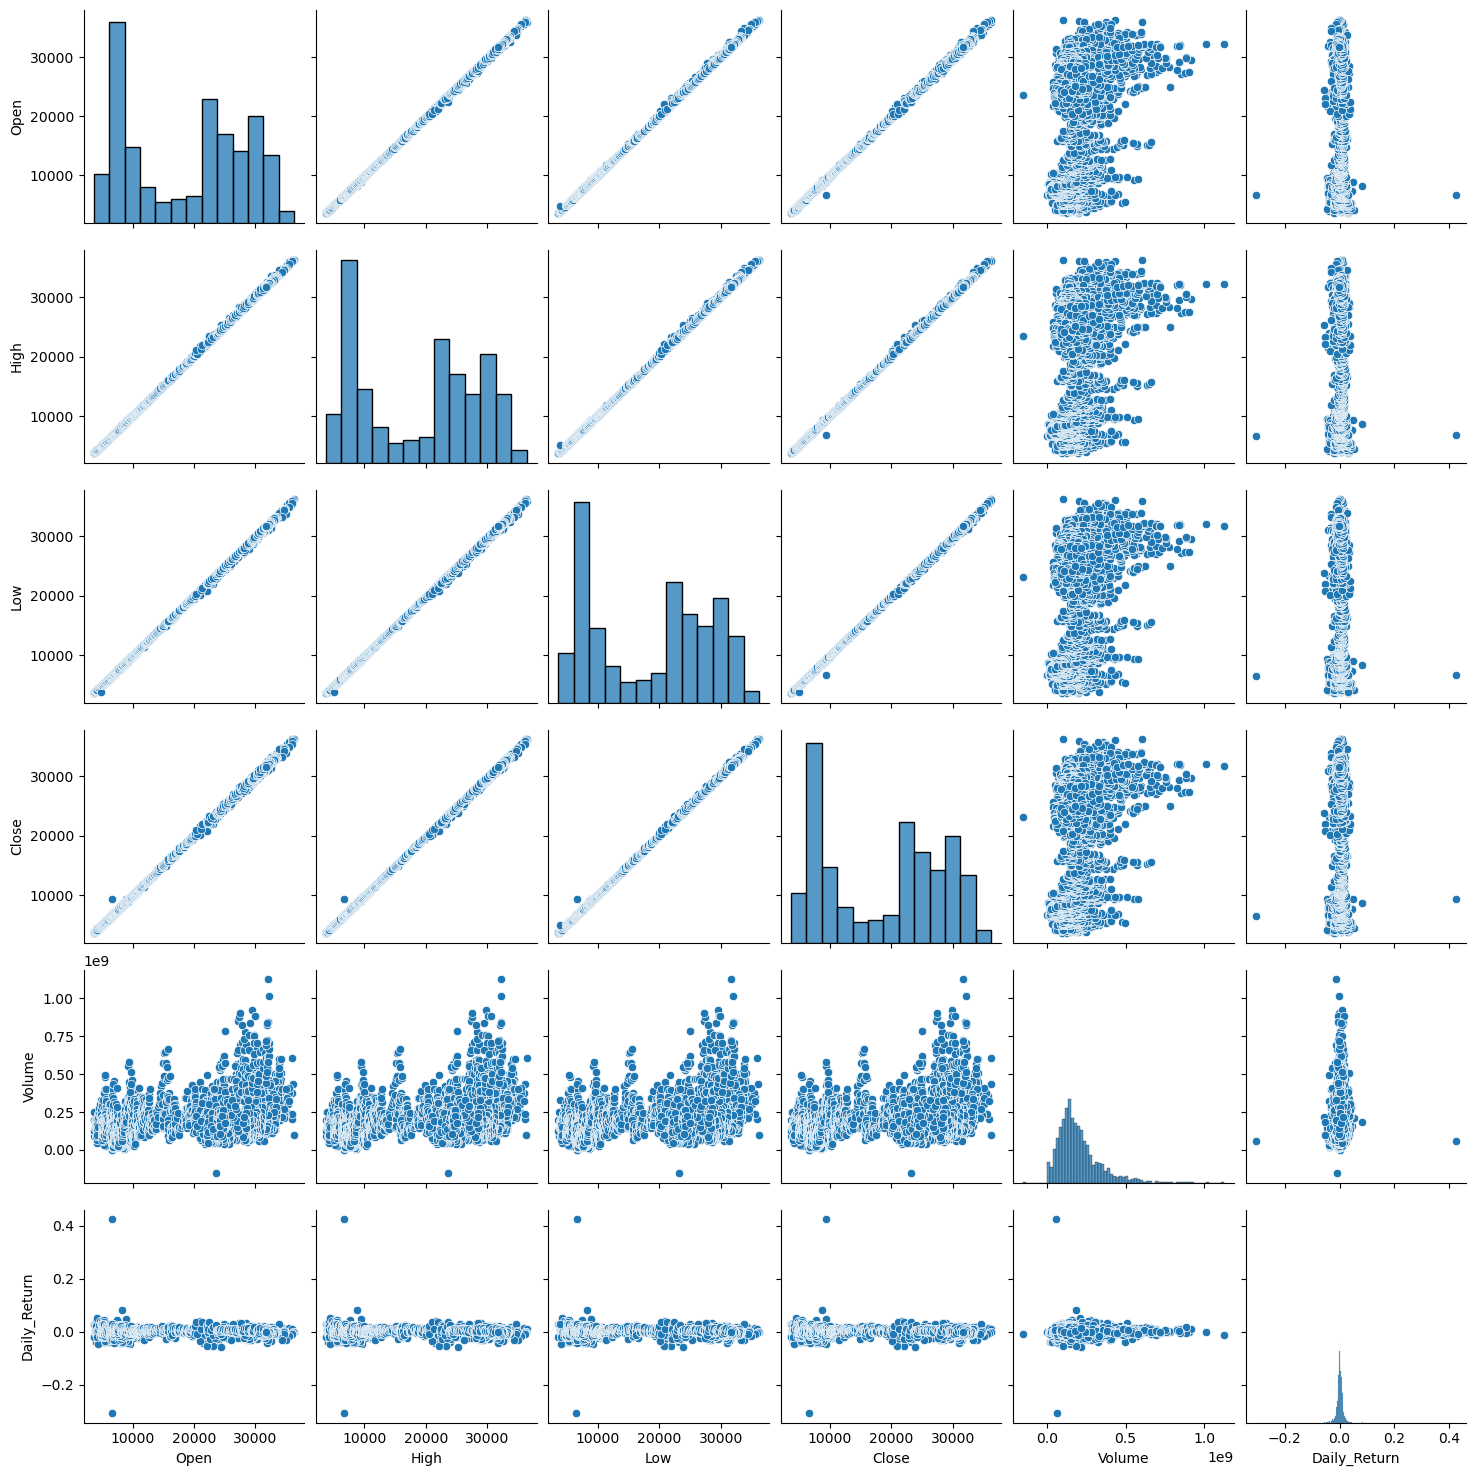

In [30]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']]) 
plt.show()

In [31]:
data2 = data
scaler = MinMaxScaler()
data2[columns_to_normalize] = scaler.fit_transform(data2[columns_to_normalize])

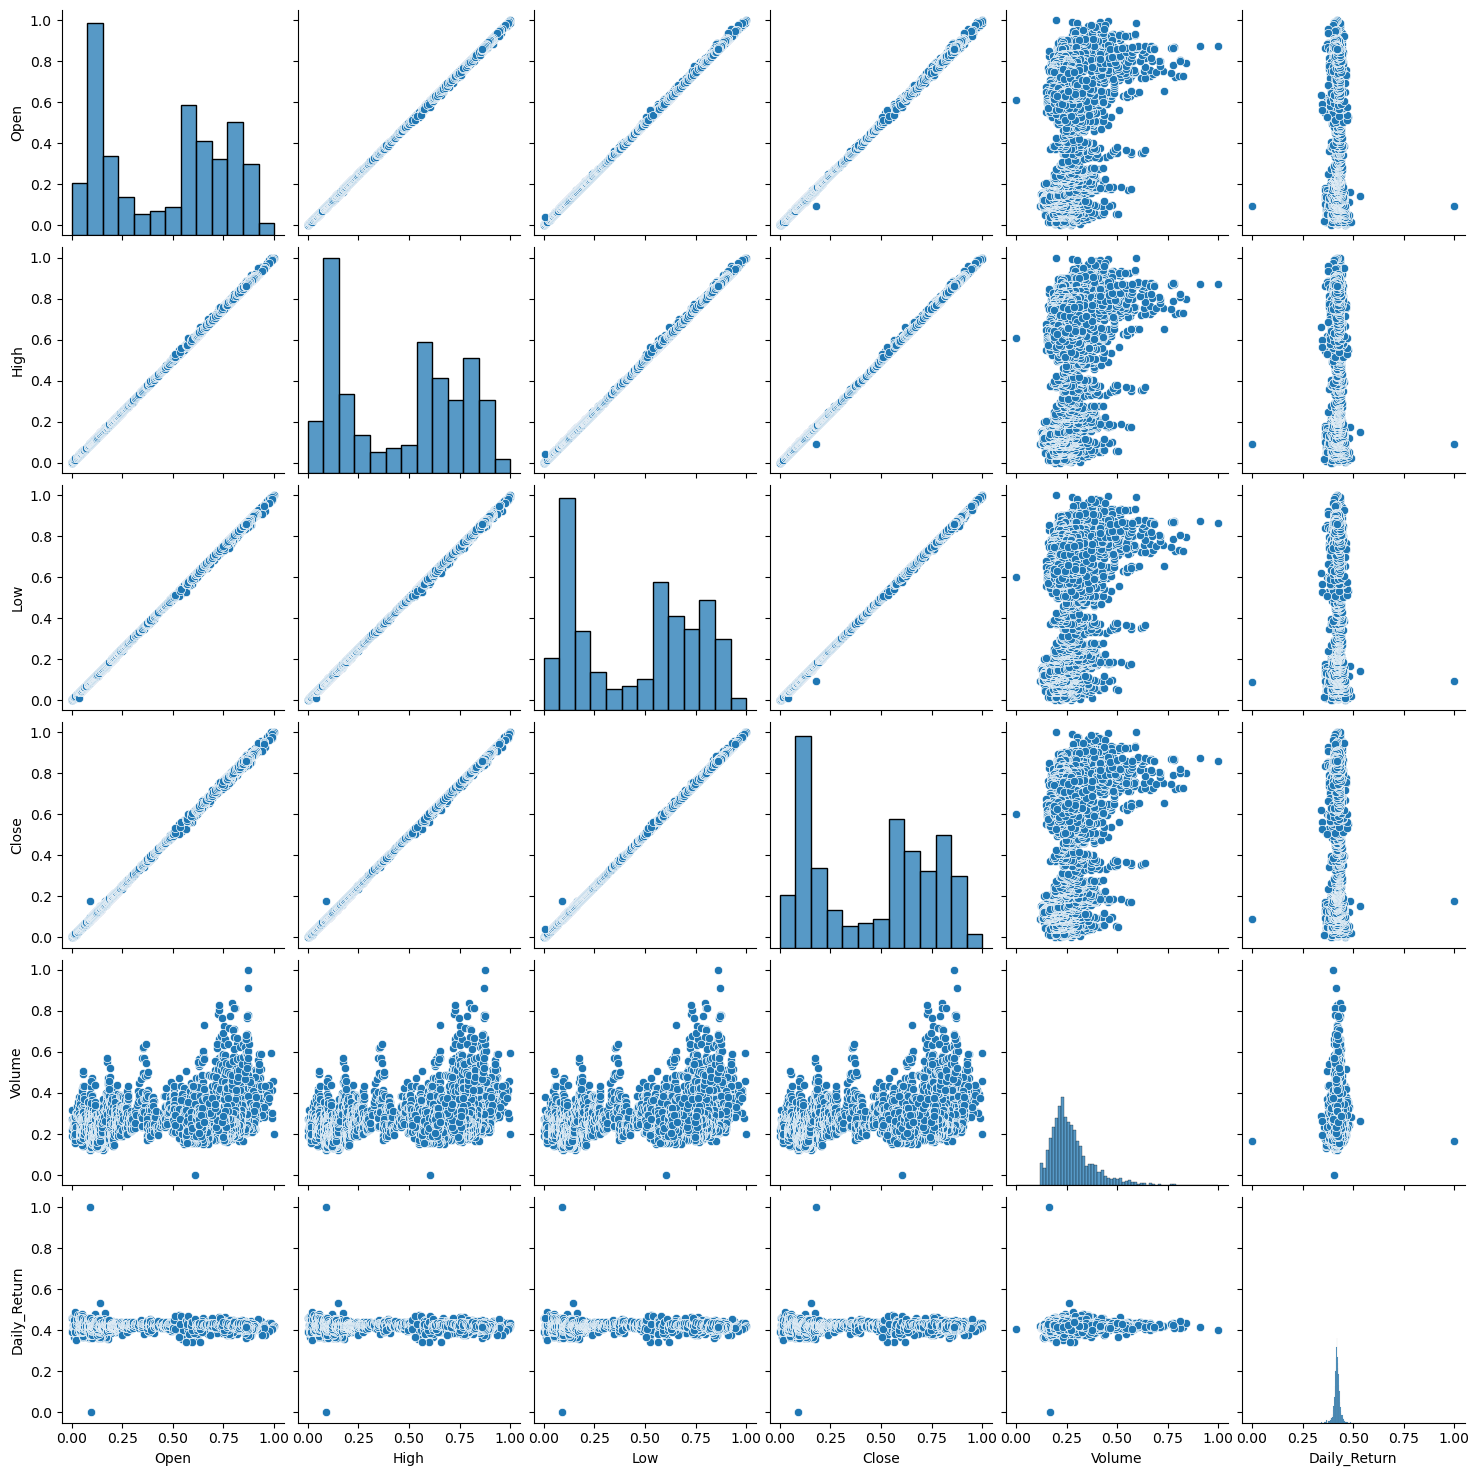

In [32]:
sns.pairplot(data2[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']]) 
plt.show()

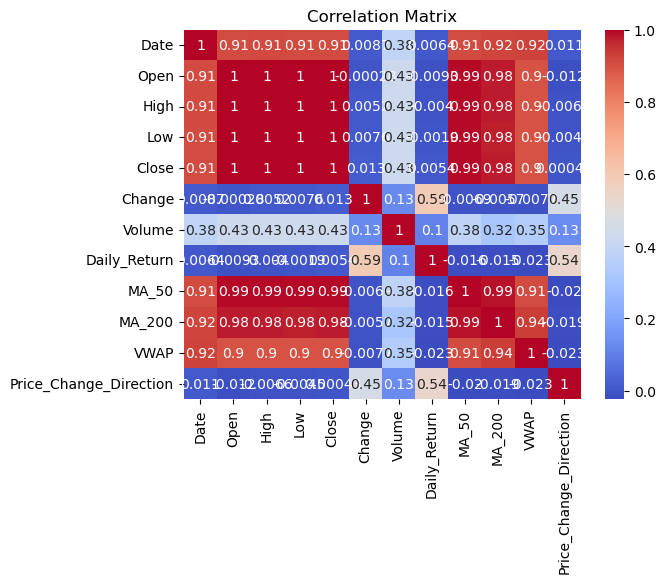

In [33]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

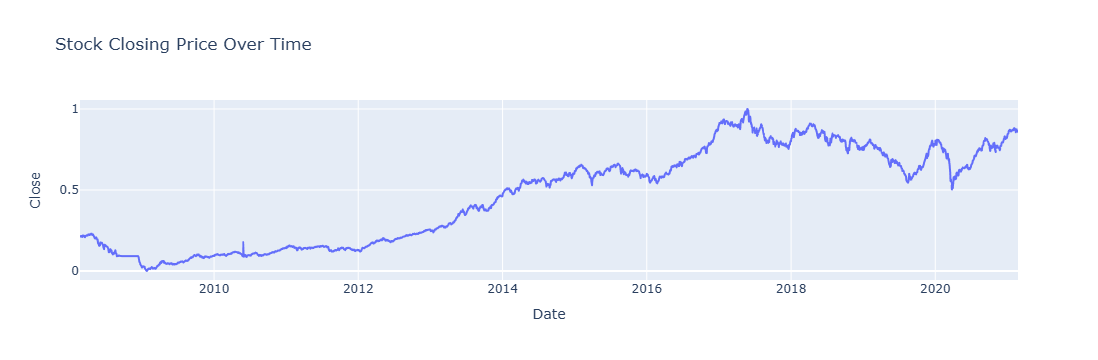

In [34]:
fig1 = px.line(data, x='Date', y='Close', title='Stock Closing Price Over Time')
fig1.show()

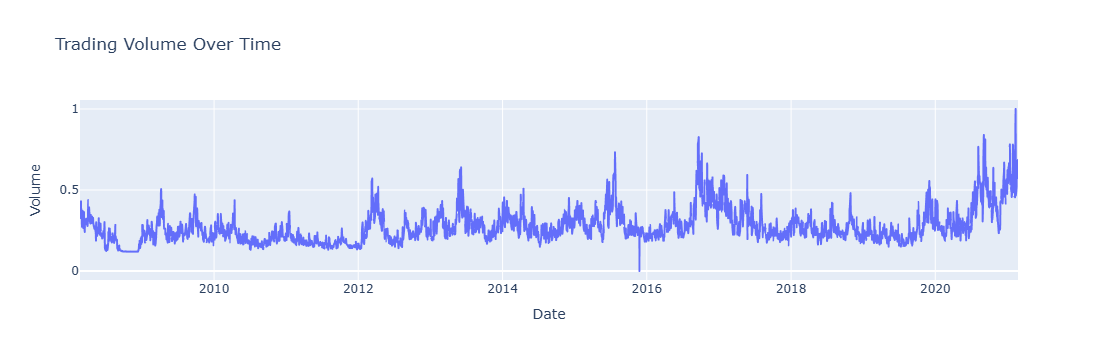

In [35]:
fig2 = px.line(data, x='Date', y='Volume', title='Trading Volume Over Time')
fig2.show()

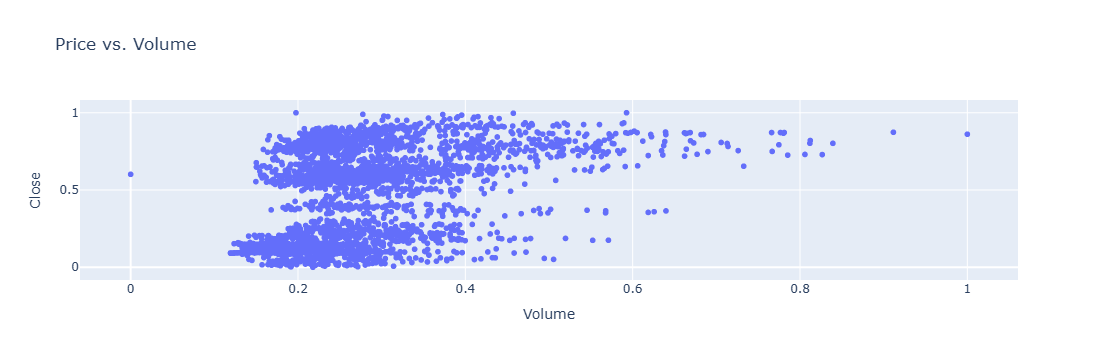

In [36]:
fig3 = px.scatter(data, x='Volume', y='Close', title='Price vs. Volume')
fig3.show()

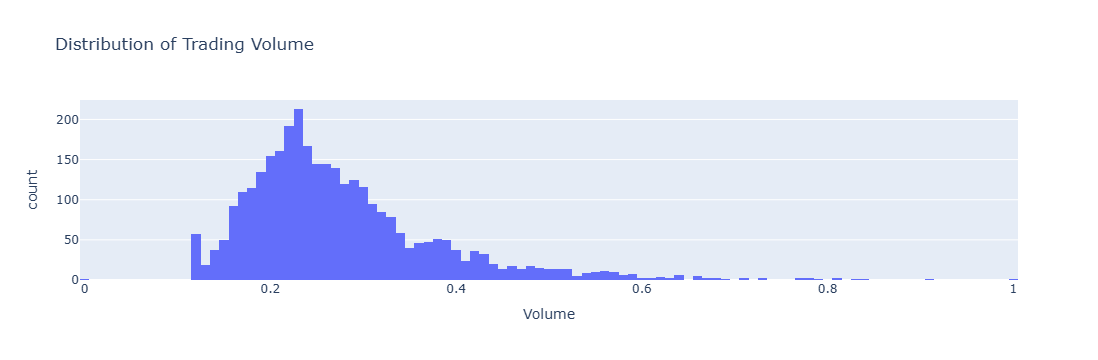

In [37]:
fig5 = px.histogram(data, x='Volume', title='Distribution of Trading Volume')
fig5.show()

In [38]:
data.head(1)

Date      Open      High       Low     Close  Change   Volume  \
3220 2008-02-22  0.214166  0.211139  0.212955  0.213587     0.0  0.36454   

      Daily_Return     MA_50    MA_200      VWAP  Price_Change_Direction  
3220      0.416899  0.220312  0.118292  0.244993                       0

In [39]:
features = ['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'MA_50', 'MA_200', 'VWAP']

In [40]:
X = data[features]

In [41]:
y = data['Close'].shift(-1)

In [42]:
look_back = 60  # Number of past days to consider
X_list = []
y_list = []
for i in range(len(X) - look_back - 1):
    X_list.append(X.iloc[i:(i+look_back)].values)
    y_list.append(y.iloc[i+look_back])

X = np.array(X_list)
y = np.array(y_list)

## 20% data test, 80% data train

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1)) 

D:\conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [46]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1) 

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0484
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0011
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.3875e-04
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.6268e-04
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.9567e-04
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4.8607e-04
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.4042e-04
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 3.8508e-04
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.2773e-04
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.1314e-04
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.8852e-04
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 3.1293e-04
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2.8351e-04
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 3.5172e-04
Epoch 15/50
79/79 ━━━━━

In [47]:
y_pred = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [48]:
y_pred

array([[0.9017444 ],
       [0.7907798 ],
       [0.20362426],
       [0.50779593],
       [0.8797617 ],
       [0.82583827],
       [0.10110446],
       [0.14943807],
       [0.7899755 ],
       [0.6983231 ],
       [0.6970989 ],
       [0.64480835],
       [0.11270114],
       [0.39146212],
       [0.53399533],
       [0.8498579 ],
       [0.10910687],
       [0.5605202 ],
       [0.11130908],
       [0.69603413],
       [0.60516995],
       [0.05768321],
       [0.64329946],
       [0.10310947],
       [0.51655686],
       [0.08908855],
       [0.2799271 ],
       [0.81055254],
       [0.09566779],
       [0.06049152],
       [0.11114906],
       [0.56067634],
       [0.8427467 ],
       [0.01662092],
       [0.6121604 ],
       [0.16980109],
       [0.6486549 ],
       [0.2271128 ],
       [0.8035757 ],
       [0.75577337],
       [0.12383404],
       [0.15014109],
       [0.14106564],
       [0.19543241],
       [0.6150219 ],
       [0.76405317],
       [0.8030692 ],
       [0.727

In [50]:
X_test

array([[[0.86250526, 0.86706758, 0.86702619, ..., 0.86304595,
         0.94654371, 0.80405904],
        [0.85857268, 0.85642777, 0.85500137, ..., 0.86481884,
         0.94642971, 0.80451929],
        [0.86143499, 0.86273214, 0.86571642, ..., 0.86670443,
         0.94637047, 0.80504744],
        ...,
        [0.90208289, 0.89991329, 0.90057648, ..., 0.9316564 ,
         0.92866618, 0.8262562 ],
        [0.89588953, 0.89870369, 0.90062262, ..., 0.93298151,
         0.9290486 , 0.8267126 ],
        [0.90137764, 0.90123407, 0.90183611, ..., 0.93399574,
         0.92944067, 0.82721671]],

       [[0.90725372, 0.90600355, 0.90873873, ..., 0.9214698 ,
         0.92617788, 0.82174053],
        [0.90825882, 0.90928071, 0.91109528, ..., 0.92235895,
         0.92649582, 0.82233491],
        [0.90835612, 0.90628719, 0.90878856, ..., 0.92327736,
         0.92675876, 0.82302799],
        ...,
        [0.81657149, 0.81417574, 0.79506887, ..., 0.90577393,
         0.92947793, 0.83796085],
        [0.7

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.007244058643231374
MSE: 0.0001101981772024851
RMSE: 0.010497531957678677
R-squared: 0.9987334600943228


In [52]:
def direction_accuracy(y_true, y_pred):
    correct_predictions = 0
    for i in range(len(y_true)):
        if (y_true[i] > y_true[i-1]) and (y_pred[i] > y_true[i-1]):
            correct_predictions += 1
        elif (y_true[i] < y_true[i-1]) and (y_pred[i] < y_true[i-1]):
            correct_predictions += 1
    return correct_predictions / len(y_true)

accuracy = direction_accuracy(y_test, y_pred)
print(f"Direction Accuracy: {accuracy}")

Direction Accuracy: 0.990506329113924


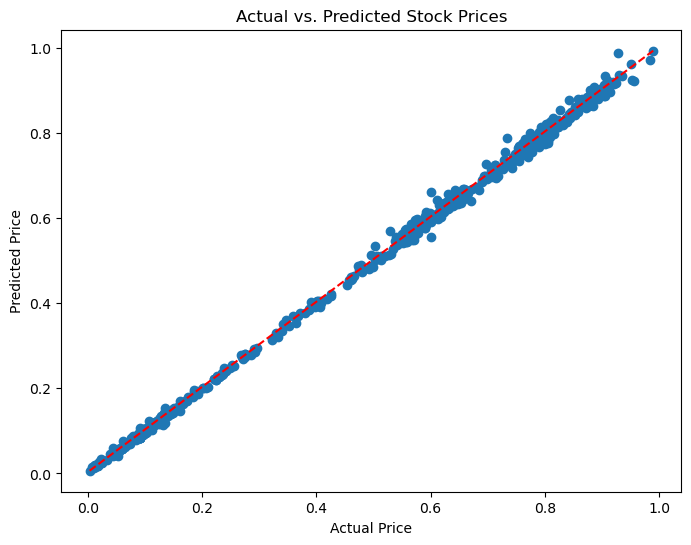

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)],[min(y_pred), max(y_pred)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [54]:
model.predict(0.214166'	0.211139	0.212955	0.213587	0.0	0.36454	0.416899	0.220312	0.118292	0.244993)

SyntaxError: unterminated string literal (detected at line 1) (3082067590.py, line 1)

In [ ]:
model.predict(np.array([[0.214166,0.211139,0.212955,0.36454,0.416899,0.220312,0.118292,0.244993]]))

In [ ]:
X_test